In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
rcParams['font.size']=18
rcParams['figure.figsize'] = (12,8)

In [4]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [5]:
pkls_high_power_cw = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-20_105213_mmw_continuous-wave_148_GHz.pkl')

In [6]:
high_cw = [nm for nm in pkls_high_power_cw if nm.atten==26]

In [195]:
r0 = high_cw[0]

In [196]:
ts = r0.fractional_fluctuation_timeseries[:]

In [197]:
ts.shape

(524288,)

In [198]:
ff = np.abs(np.fft.rfft(ts.real.reshape((-1,2**13)),axis=1))**2

In [199]:
fr = np.arange(ff.shape[1])*r0.timeseries_sample_rate/ff.shape[1]

In [200]:
ff.shape

(64, 4097)

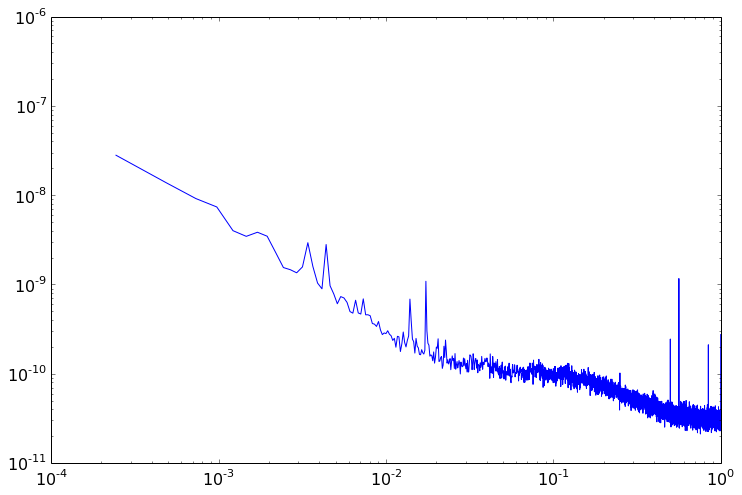

In [202]:
loglog(fr/fr.max(),ff.mean(0))

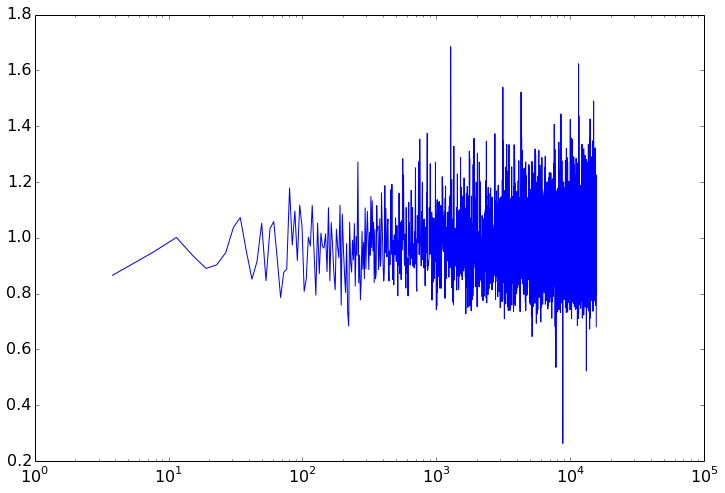

In [18]:
semilogx(fr,ff.std(0)/ff.mean(0))

In [19]:
pkls_low_power = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-19_101902_mmw_continuous-wave_148_GHz.pkl')

In [20]:
low_cw  = [nm for nm in pkls_low_power if nm.atten==35]

In [21]:
l0 = low_cw[0]

In [22]:
tsl = l0.fractional_fluctuation_timeseries[:]

In [30]:
ffl = np.abs(np.fft.rfft(tsl.real.reshape((-1,2**15)),axis=1))**2

In [31]:
frl = np.arange(ffl.shape[1])*r0.timeseries_sample_rate/((ffl.shape[1]-1)*2)

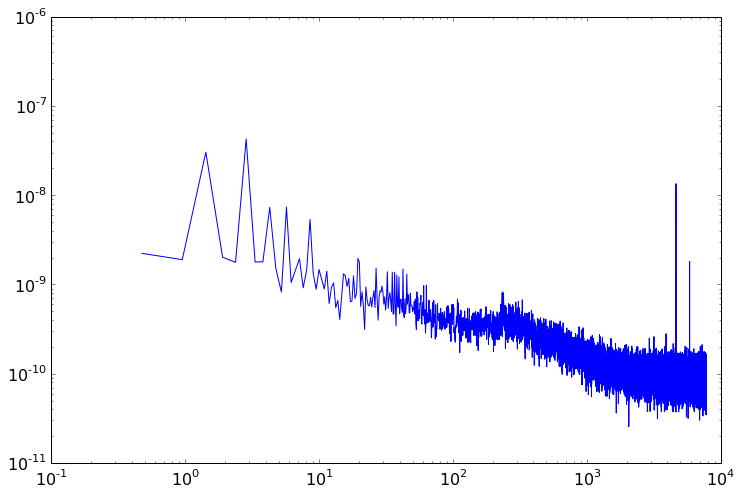

In [32]:
loglog(frl,ffl.mean(0))

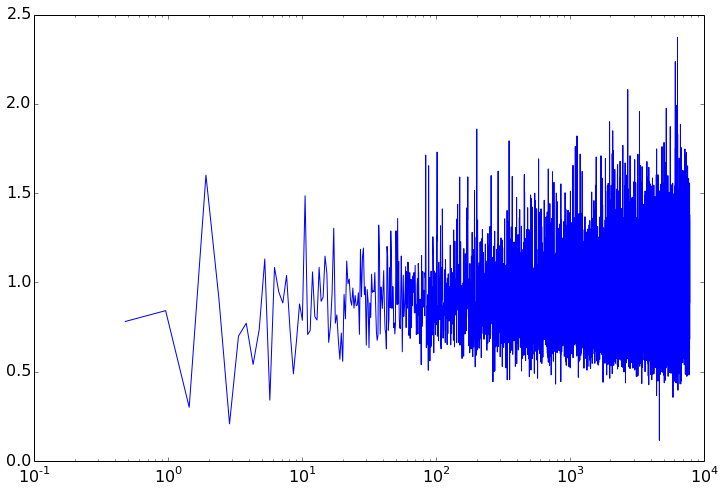

In [34]:
semilogx(frl,ffl.std(0)/ffl.mean(0))

(1e-11, 8e-08)

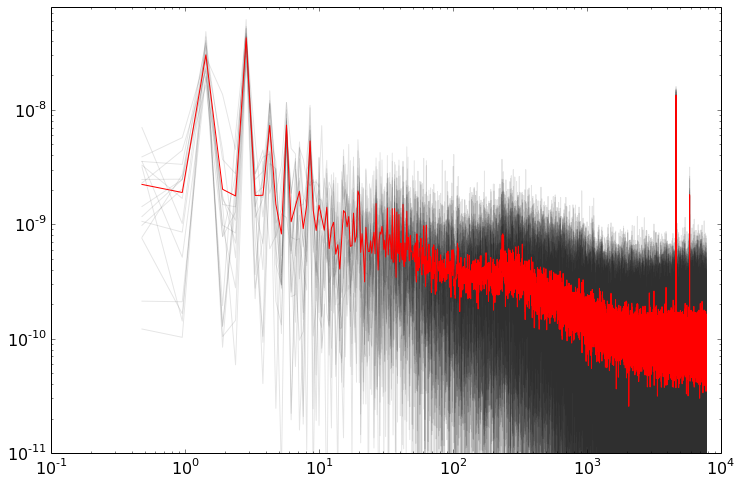

In [57]:
for k in range(ffl.shape[0]):
    loglog(frl,ffl[k,:],'k',alpha=.1)
loglog(frl,ffl.mean(0),'r')
#yscale('linear')
ylim(1e-11,.8e-7)

(1e-11, 1e-07)

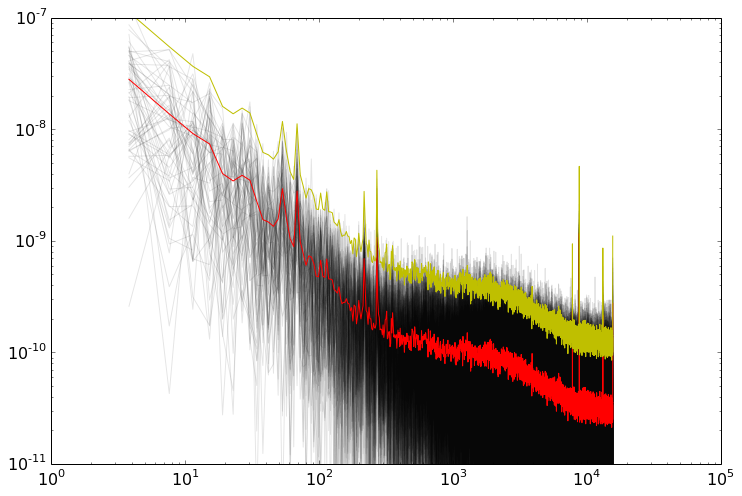

In [61]:
for k in range(ff.shape[0]):
    loglog(fr,ff[k,:],'k',alpha=.1)
loglog(fr,ff.mean(0),'r')
loglog(fr,4*ff.mean(0),'y')
ylim(1e-11,1e-7)

In [62]:
ts0 = high_cw[0].fractional_fluctuation_timeseries[:]
ts1 = high_cw[1].fractional_fluctuation_timeseries[:]


(-0.011, -0.0111)

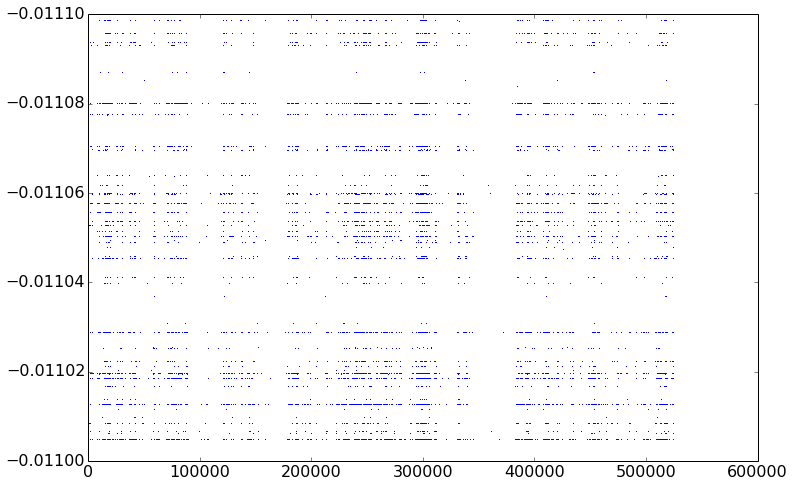

In [82]:
plot(r0.original_timeseries.real,',')
ylim(-0.011,-0.0111)
#ylim(0.61,0.611)

In [77]:
np.finfo(np.float32)

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [91]:
_77.tiny

1.1754944e-38

In [102]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

(0, 10000)

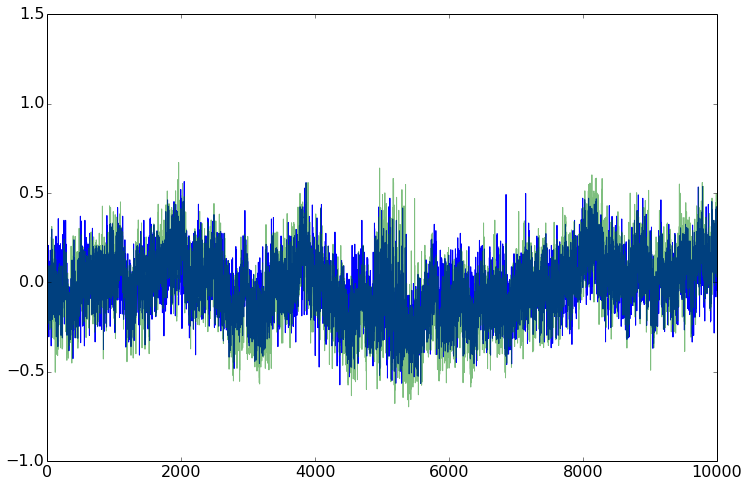

In [127]:
plot(1.6*ts0.real*1e6)
plot(ts1.real*1e6,alpha=0.5)
xlim(0,10000)
#ylim(-1e-8,1e-8)

In [134]:
pxx,fr = mlab.psd(-1.6*ts0.real+ts1.real,NFFT=2**15,Fs=256e6/2**14)

In [ ]:
tss = [x.fractional_fluctuation_timeseries]

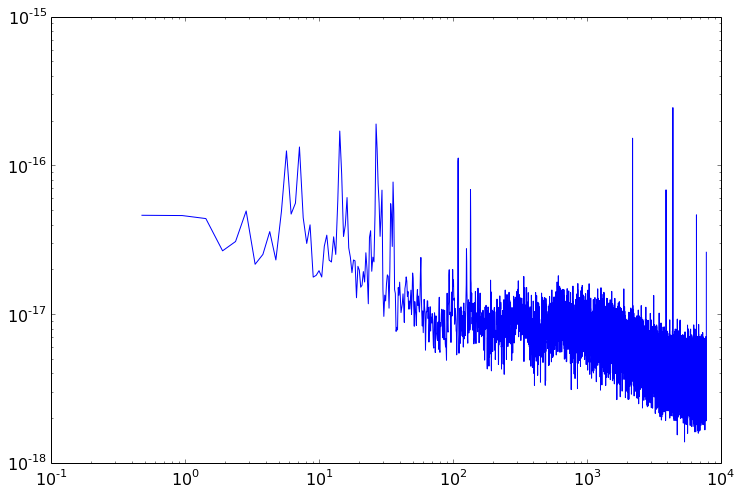

In [145]:
pxx,fr = mlab.psd(-2.3*ts0.real+ts1.real,NFFT=2**15,Fs=256e6/2**14)
loglog(fr,pxx)

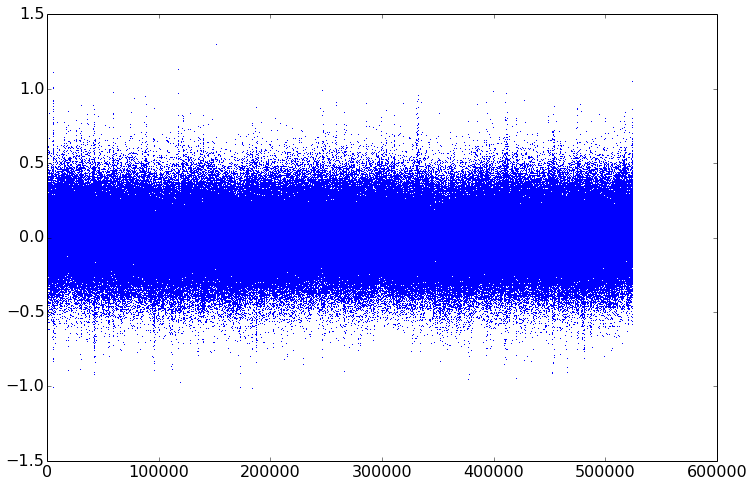

In [129]:
plot((-2*ts0.real+ts1.real)*1e6,',')

In [14]:
tss = [snm.fractional_fluctuation_timeseries[:].real for snm in high_cw]

In [15]:
tss = np.vstack(tss)

In [16]:
tss.shape

(16, 524288)

In [17]:
tss = tss.T

In [20]:
fss = np.fft.rfft(tss,axis=0)

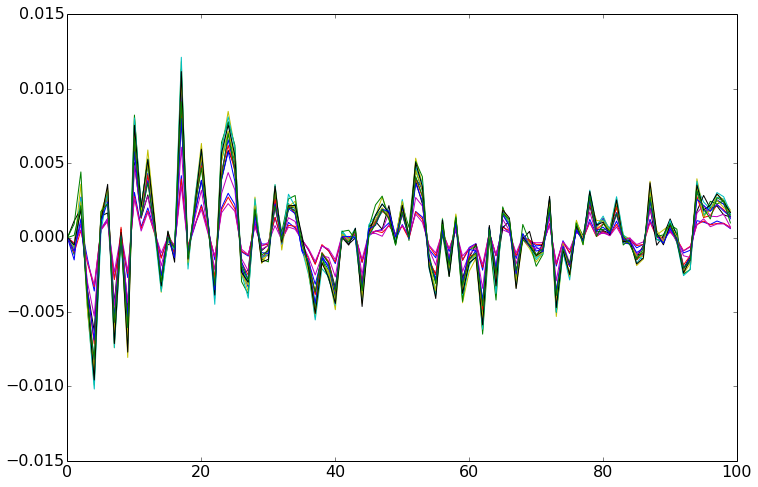

In [25]:
plot(fss[:100].imag)

In [227]:
U,S,V = np.linalg.svd(fss[:fss.shape[0]//8],full_matrices=False)

In [228]:
U.shape

(32768, 16)

In [229]:
S.shape

(16,)

In [274]:
fss.shape[0]//8

32768

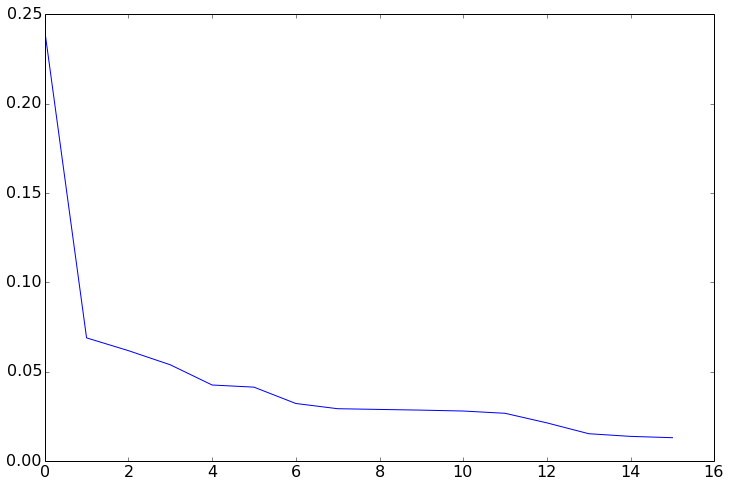

In [230]:
plot(S)

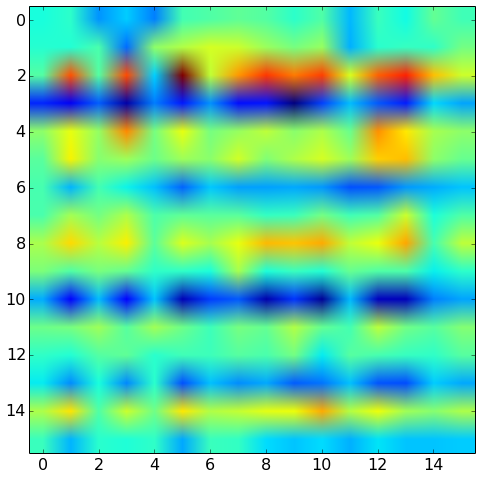

In [209]:
imshow(np.dot(U[:16,:16],V).real)

In [210]:
recon = np.dot(np.dot(U[:,:1],np.diag(S[:1])),np.conj(V[:,:1]).T)

In [211]:
recon.shape

(16384, 16)

In [71]:
fss.shape

(262145, 16)

<matplotlib.colorbar.Colorbar instance at 0x25a537e8>

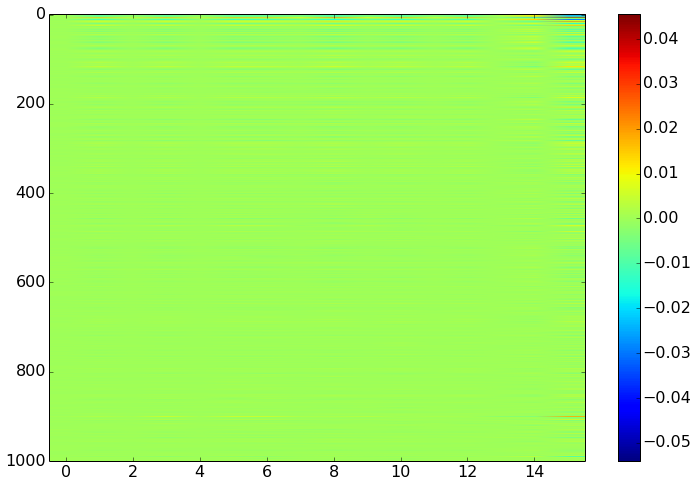

In [81]:
imshow(recon.real-fss[:1000].real,aspect='auto')
colorbar()

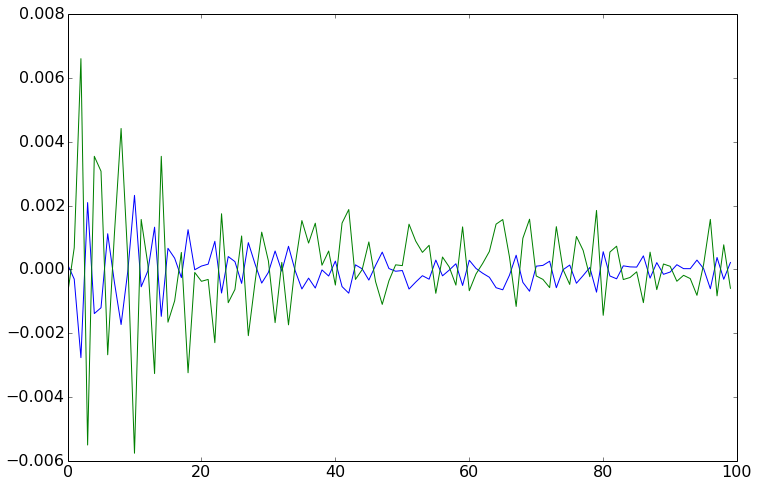

In [212]:
plot(recon.real[:100,2])
plot(fss[:100,2].real)

In [28]:
np.linalg.svd?

In [85]:
import sklearn.decomposition

In [88]:
SVD = sklearn.decomposition.PCA()

In [97]:
blah = SVD.fit_transform(fss[:1000].T)

In [98]:
blah.shape

(16, 16)

In [94]:
SVD.components_.shape

(16, 16)

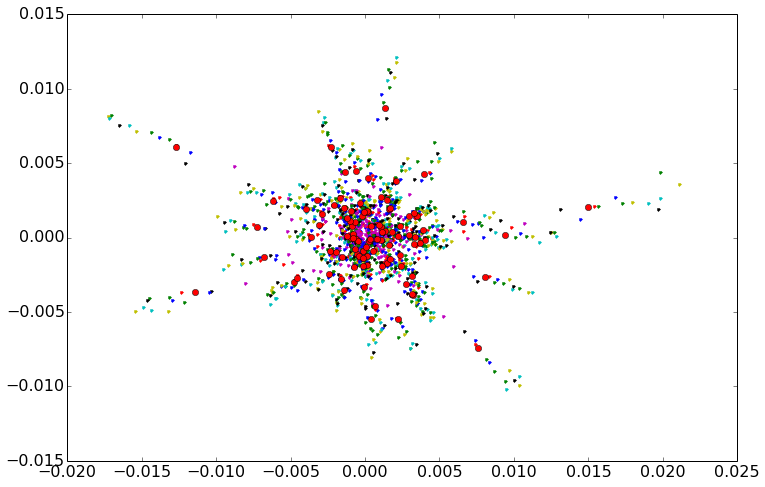

In [113]:
plot(fss[:100].real,fss[:100].imag,'.')
plot(fss[:100].real.mean(1),fss[:100].imag.mean(1),'o')


In [231]:
recon = np.dot(np.dot(U[:,:1],np.diag(S[:1])),np.conj(V[:1,:]))

In [232]:
full_recon = np.zeros_like(fss)
full_recon[:recon.shape[0],:] = recon
recon_tss = np.fft.irfft(full_recon,axis=0)

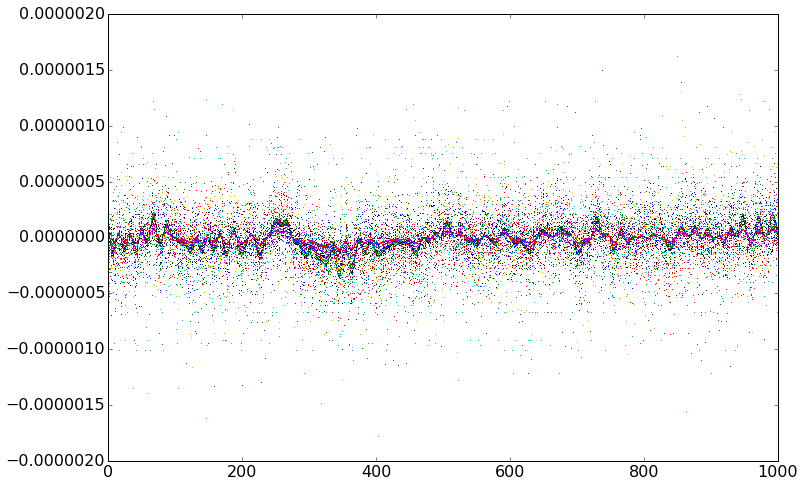

In [233]:
plot(recon_tss[:1000],',')
plot(tss[:1000],',')

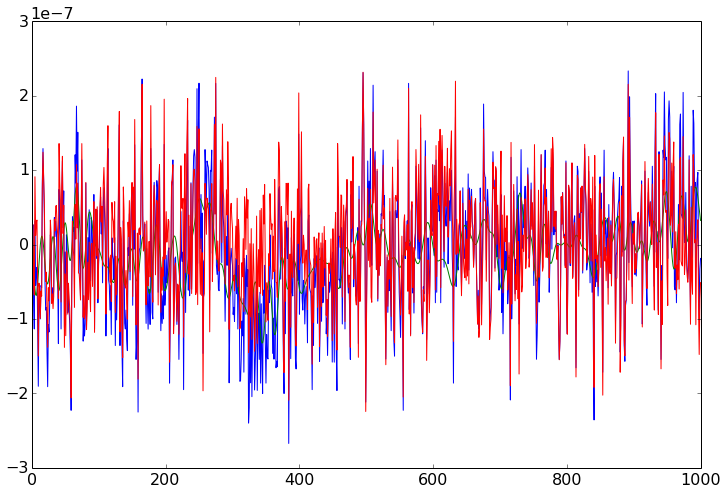

In [234]:
plot(tss[:1000,0])
#plot(tss[:1000,2])

plot(recon_tss[:1000,0])

plot(tss[:1000,0]-recon_tss[:1000,0])

(1e-19, 1e-15)

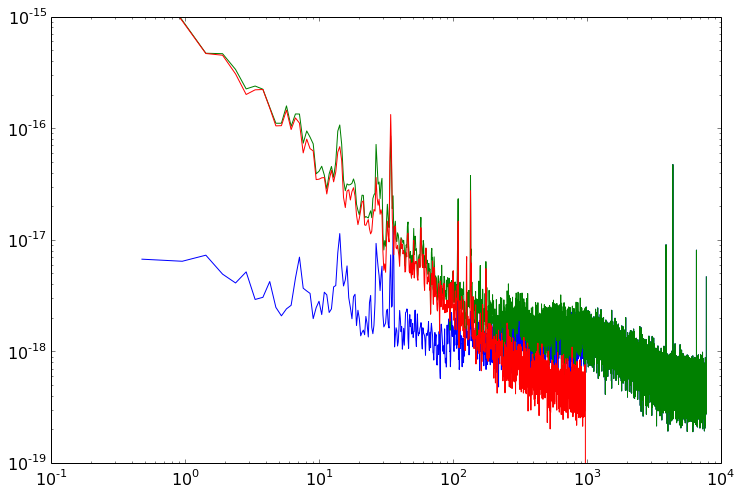

In [235]:
pxx,fr = mlab.psd(tss[:,0]-recon_tss[:,0],NFFT=2**15,Fs=256e6/2**14)
loglog(fr,pxx)
pxx,fr = mlab.psd(tss[:,0],NFFT=2**15,Fs=256e6/2**14)
loglog(fr,pxx)
pxx,fr = mlab.psd(recon_tss[:,0],NFFT=2**15,Fs=256e6/2**14)
loglog(fr,pxx)
ylim(1e-19,1e-15)

In [266]:
np.fft.fftfreq(8)

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

In [271]:
np.fft.fftfreq(16,2.)

array([ 0.     ,  0.03125,  0.0625 ,  0.09375,  0.125  ,  0.15625,
        0.1875 ,  0.21875, -0.25   , -0.21875, -0.1875 , -0.15625,
       -0.125  , -0.09375, -0.0625 , -0.03125])

In [272]:
np.random.rand

<function rand>

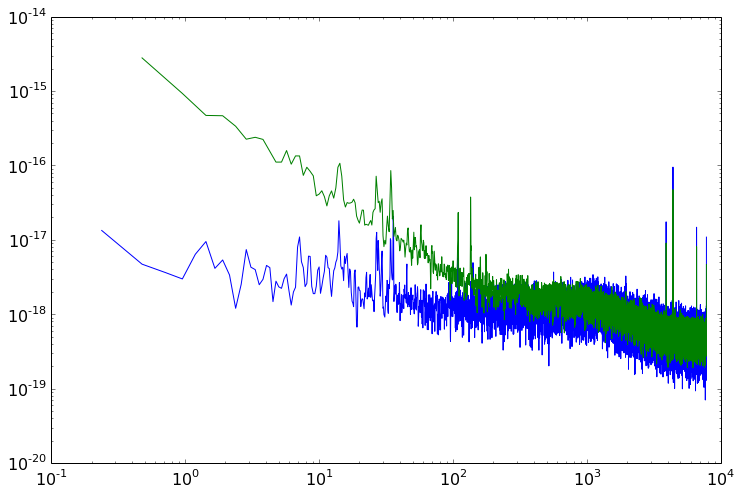

In [238]:
pxx,fr = mlab.psd(tss[:,0]-recon_tss[:,0],NFFT=2**16,Fs=256e6/2**14)
loglog(fr,pxx)
pxx,fr = mlab.psd(tss[:,0],NFFT=2**15,Fs=256e6/2**14)
loglog(fr,pxx)


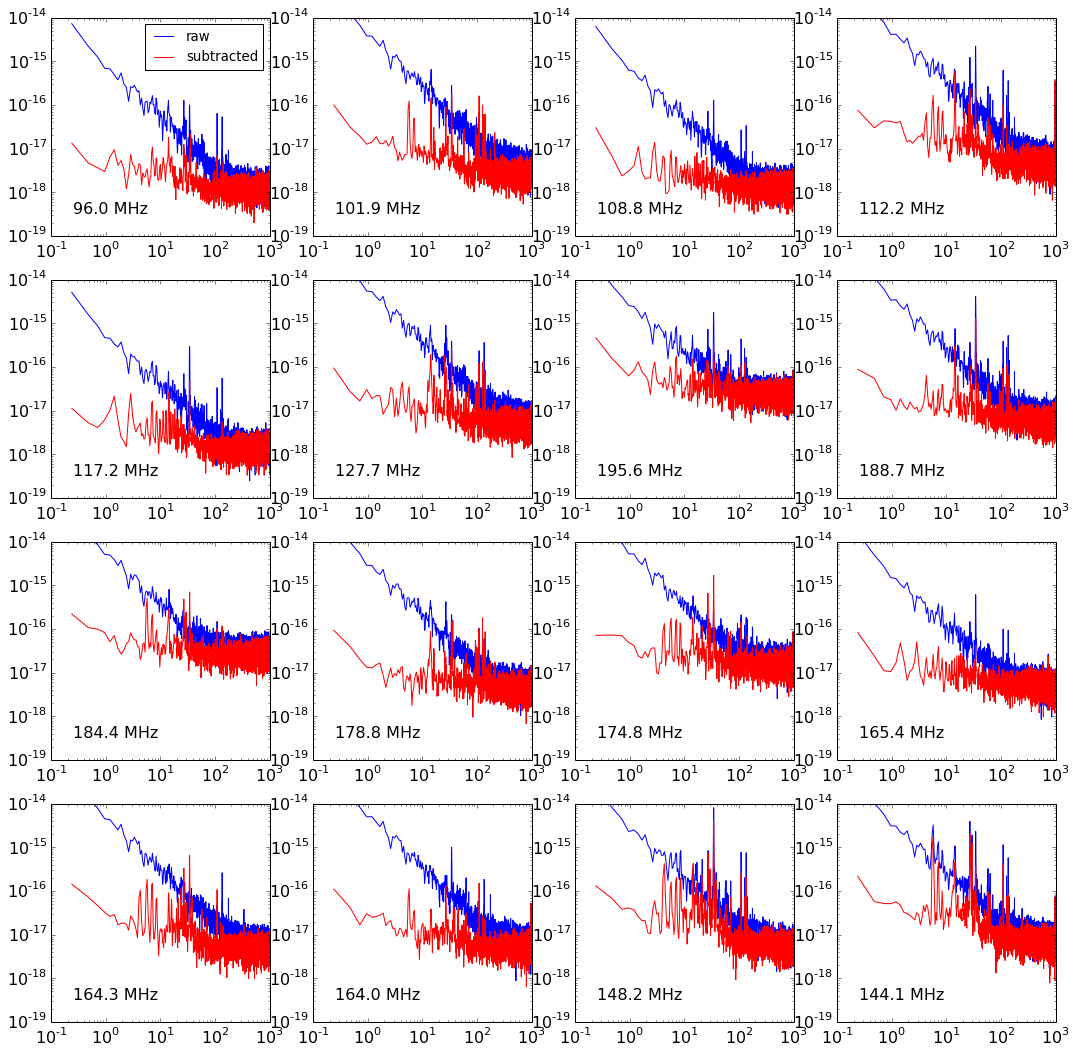

In [264]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(tss[:,k],NFFT=2**16,Fs=256e6/2**14)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(tss[:,k]-recon_tss[:,k],NFFT=2**16,Fs=256e6/2**14)
    ax.loglog(fr,pxx,'r')
    ax.set_ylim(1e-19,1e-14)
    ax.set_xlim(0.1,1e3)
    f0 = high_cw[k].noise_measurement_freq_MHz
    ax.text(0.1,0.1,('%.1f MHz' % f0),transform=ax.transAxes)
axs[0,0].legend(['raw','subtracted'],prop=dict(size='small'))
savefig('/data/readout/archive/2015-12-06-remove-correlated-noise-fine.pdf',bbox_inches='tight')

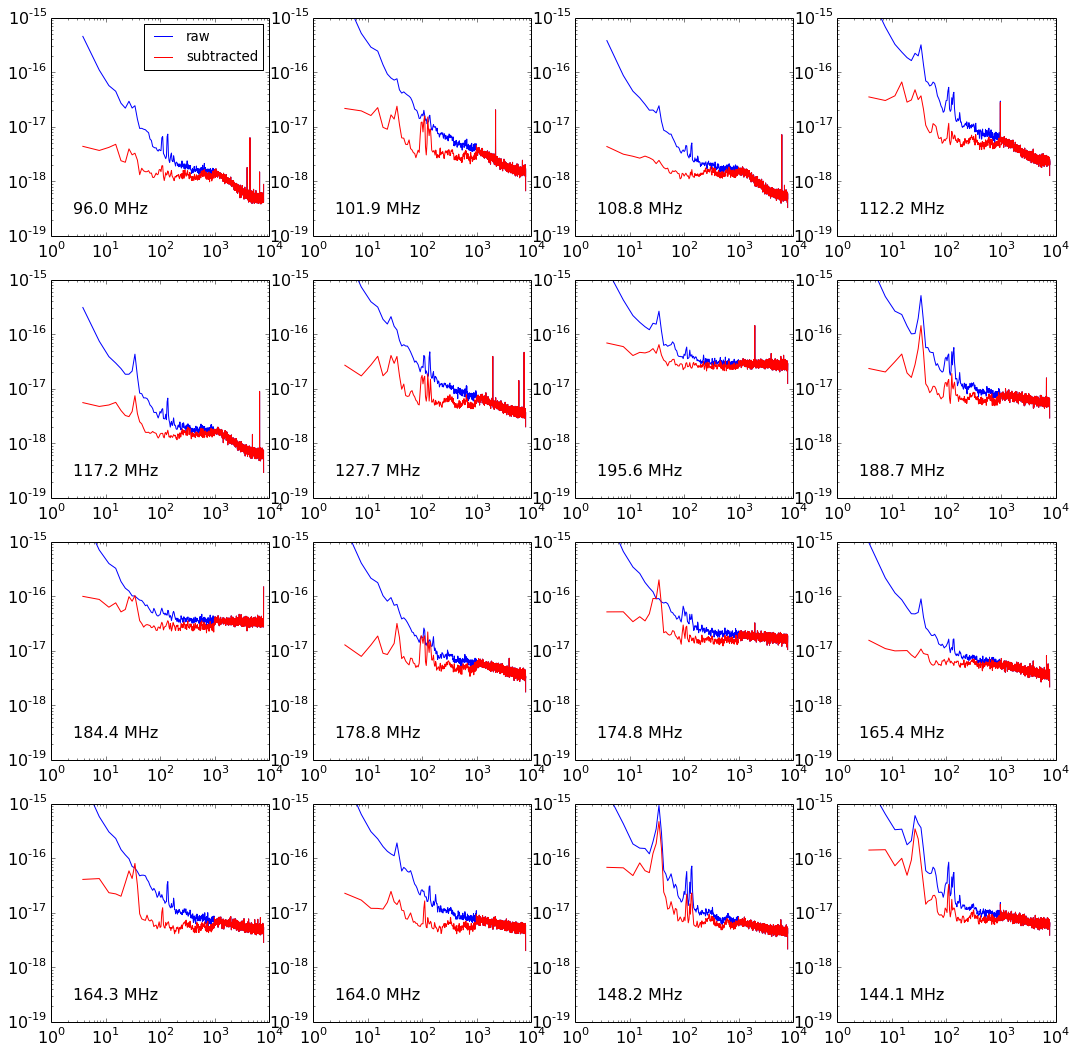

In [265]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(tss[:,k],NFFT=2**12,Fs=256e6/2**14)
    ax.loglog(fr,pxx)
    pxx,fr = mlab.psd(tss[:,k]-recon_tss[:,k],NFFT=2**12,Fs=256e6/2**14)
    ax.loglog(fr,pxx,'r')
    ax.set_ylim(1e-19,1e-15)
    f0 = high_cw[k].noise_measurement_freq_MHz
    ax.text(0.1,0.1,('%.1f MHz' % f0),transform=ax.transAxes)
axs[0,0].legend(['raw','subtracted'],prop=dict(size='small'))
savefig('/data/readout/archive/2015-12-06-remove-correlated-noise-coarse.pdf',bbox_inches='tight')

In [278]:
fr[400]

1525.87890625

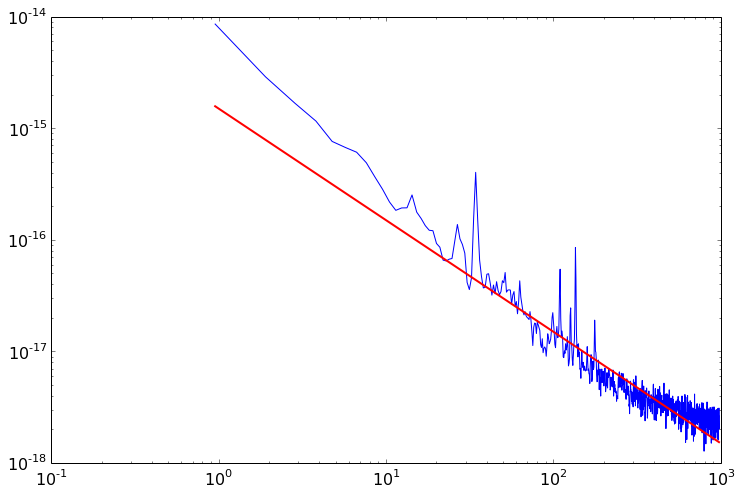

In [295]:
pxx,fr = mlab.psd(recon_tss[:,k],NFFT=2**14,Fs=256e6/2**14)
loglog(fr[:256*4],pxx[:256*4])
loglog(fr[1:256*4],1.5e-15*fr[1:256*4]**-1,lw=2,color='r')

In [139]:
np.dot(np.diag(S[:1]),np.conj(V[:1,:]))

array([[ 0.02589998 +0.00000000e+00j,  0.05906208 +1.00128282e-04j,
         0.02372696 +1.08670738e-04j,  0.06511445 -4.49234920e-04j,
         0.02123889 -1.05648461e-04j,  0.07054968 -4.09232446e-04j,
         0.04785390 -8.50403954e-04j,  0.05711512 -2.99006700e-04j,
         0.06548624 -2.56853453e-04j,  0.05267826 -1.44690236e-04j,
         0.06733504 -9.31465616e-06j,  0.03732959 -1.62290628e-04j,
         0.06142866 -2.81925668e-04j,  0.06622580 +4.78275595e-05j,
         0.04828067 -1.75567635e-04j,  0.05746522 -7.26245954e-04j]])

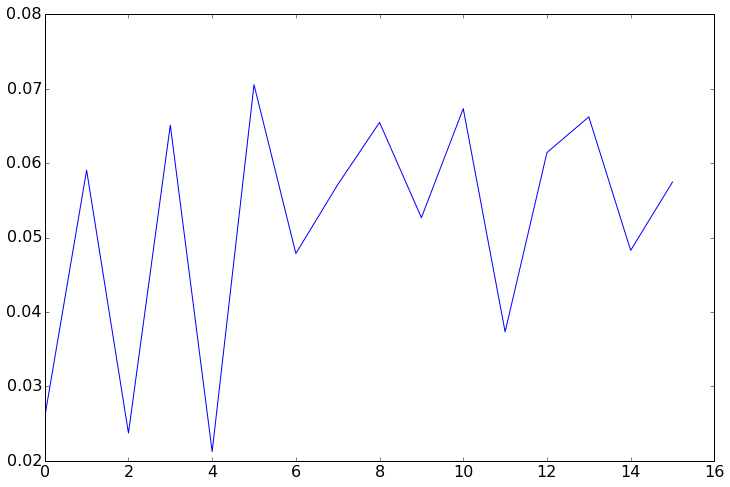

In [141]:
plot(np.abs(S[0]*V[0]))

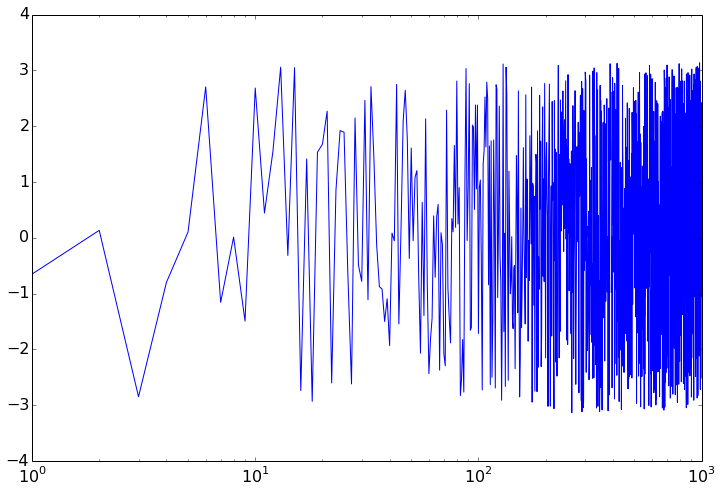

In [154]:
semilogx(np.angle(fss[:1000,1]),)

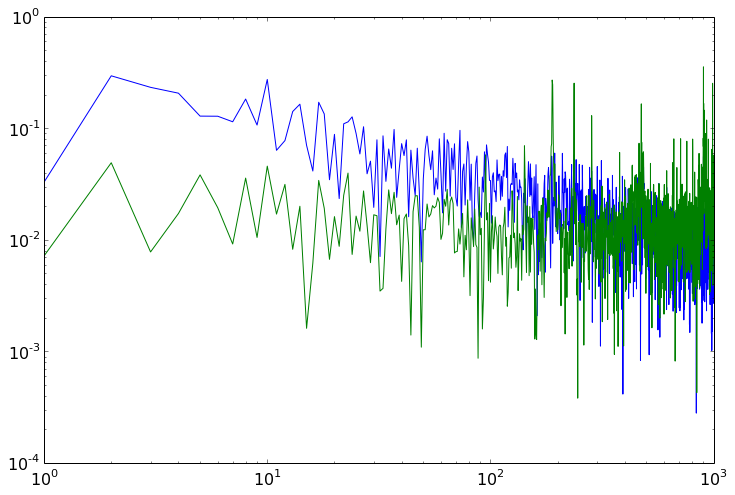

In [143]:
loglog(np.abs(U[:,:2]))

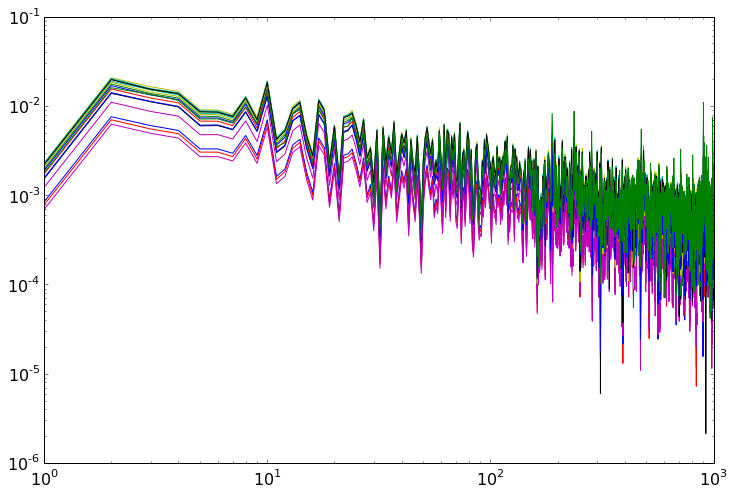

In [144]:
loglog(np.abs(recon))

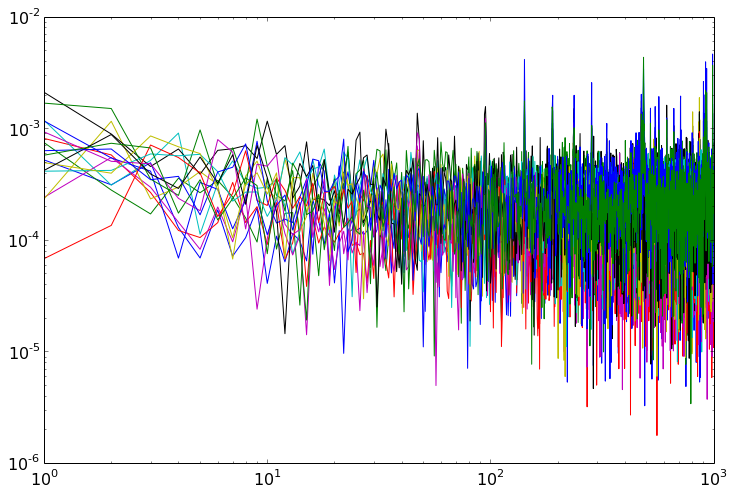

In [145]:
loglog(np.abs(recon-fss[:1000]))

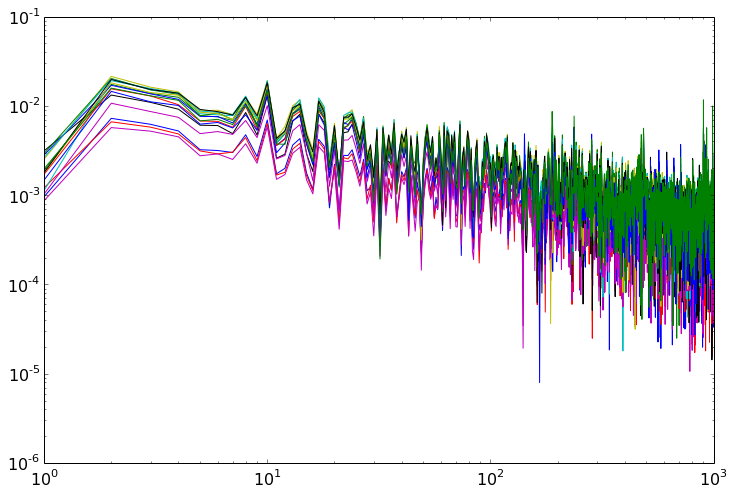

In [123]:
loglog(np.abs(fss[:1000]))

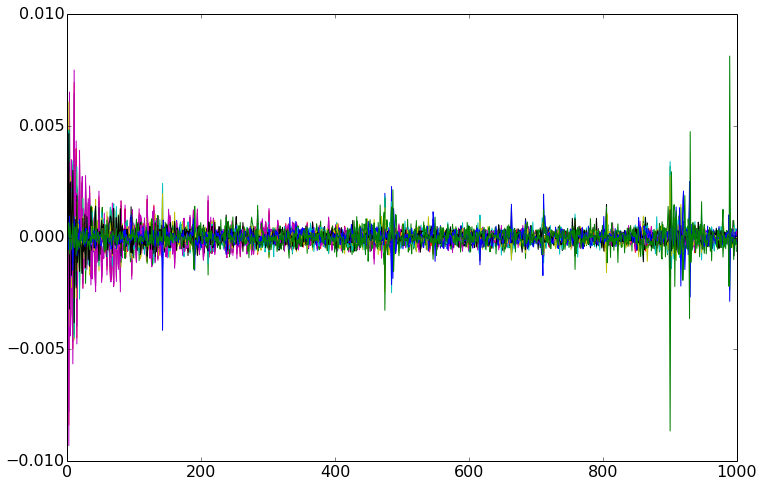

In [110]:
plot((fss[:1000]-fss[:1000].mean(1)[:,None]).real)

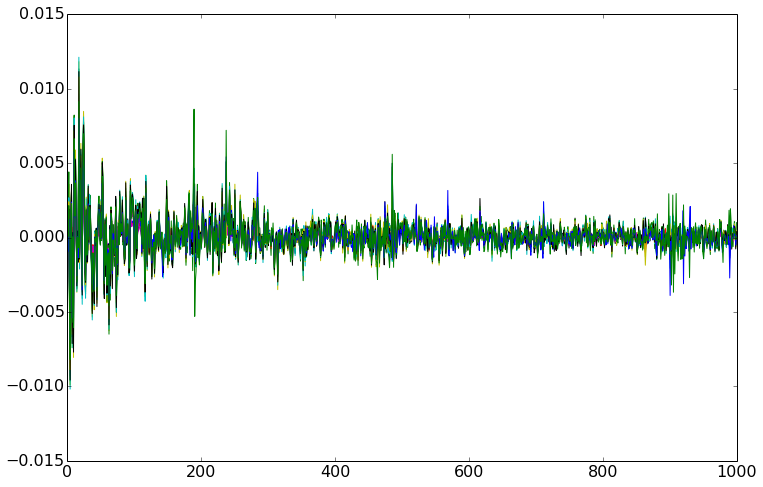

In [104]:
plot(fss[:1000].imag)

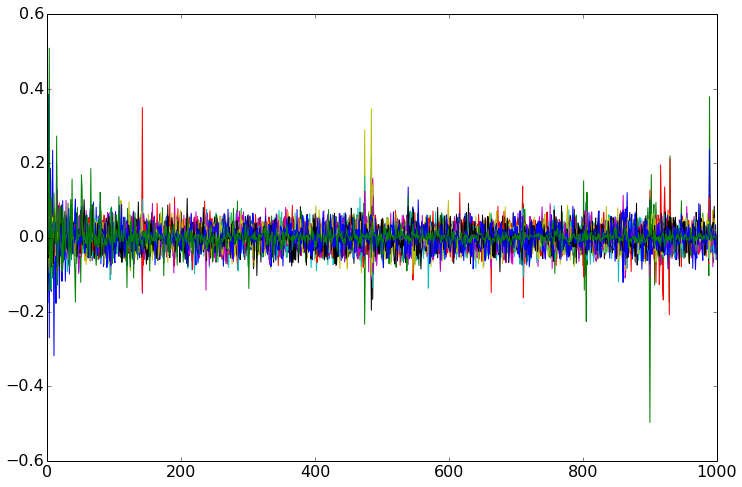

In [102]:
plot(SVD.components_.T.real)